In [77]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [57]:
#目的変数の意味確認

# ID→内部ID
# name→プロジェクト名
# category→サブカテゴリ
# main_category→メインカテゴリ
# currency→通貨
# deadline→期限
# goal→目標金額 (currency単位)
# launched→発売日
# pledged→実際に集まった額
# state→プロジェクトの現状
# backers→パトロンの人数
# country→国
# usd pledged→US＄で集まった額
# usd_pledged_real→US＄換算のpledged？
# usd_goal_real→US＄換算の目標額

In [58]:
#データ読み込み
df = pd.read_csv("ks-projects-201801.csv")
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [59]:
#説明変数の数量を確認
df.count()

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

In [60]:
df.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,378657,378661,378661,378661,378661,3.786610e+05,378661,3.786610e+05,378661,378661.000000,378661,3.748640e+05,3.786610e+05,3.786610e+05
unique,NaN,375764,159,15,14,3164,NaN,378089,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,41,22314,63585,295365,705,NaN,7,NaN,197719,NaN,292627,NaN,NaN,NaN
mean,1.074731e+09,NaN,NaN,NaN,NaN,NaN,4.908079e+04,NaN,9.682979e+03,NaN,105.617476,NaN,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,NaN,NaN,NaN,NaN,NaN,1.183391e+06,NaN,9.563601e+04,NaN,907.185035,NaN,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,NaN,NaN,NaN,NaN,NaN,5.200000e+03,NaN,6.200000e+02,NaN,12.000000,NaN,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.076000e+03,NaN,56.000000,NaN,3.034090e+03,4.050000e+03,1.550000e+04


In [61]:
#欠損値の確認
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [62]:
#今回successfulとfailed以外は対象外とする
df2 = df.copy()
df2 = df2[df2['state'].isin(['failed','successful'])]

In [63]:
#説明変数の数量を再度確認
df2.count()

ID                  331675
name                331672
category            331675
main_category       331675
currency            331675
deadline            331675
goal                331675
launched            331675
pledged             331675
state               331675
backers             331675
country             331675
usd pledged         331465
usd_pledged_real    331675
usd_goal_real       331675
dtype: int64

In [64]:
#目的変数successfulとfailedを2値表示する
df2.loc[df2['state'] == 'failed', 'state'] = 0
df2.loc[df2['state'] == 'successful', 'state'] = 1
df2.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,50000.00


In [65]:
#不要な列を削除(この段階ではまだ削除しない方がいい？)
df2 = df2.drop(['ID','name','pledged','usd pledged','usd_pledged_real','backers'],axis=1)
df2.head()

,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0,GB,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,0,US,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,0,US,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,0,US,5000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,1,US,50000.00


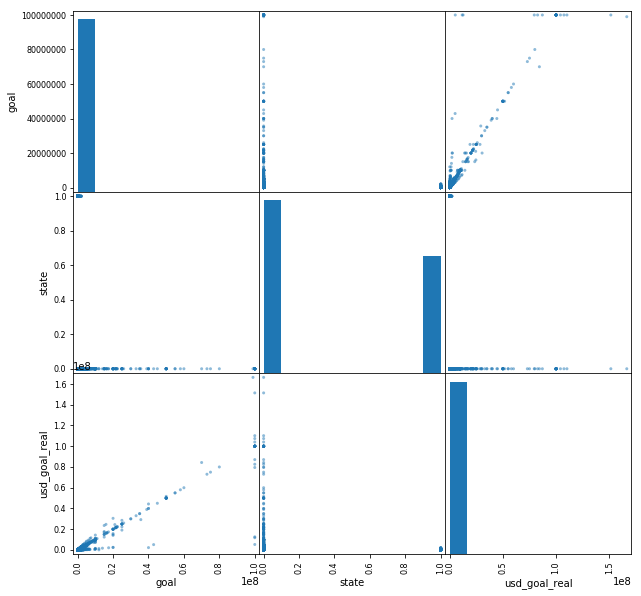

In [66]:
# 散布図行列
pd.plotting.scatter_matrix(df2, figsize=(10,10))
plt.show()

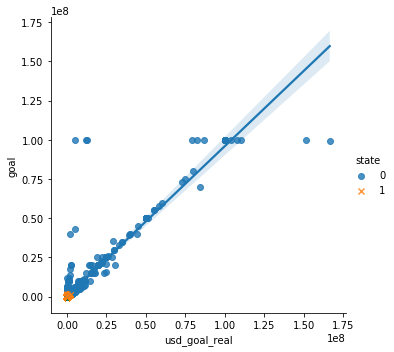

In [67]:
#goalとusd_goal_realは相関がありそう
#成功：１　失敗：０で分けてみる
sns.lmplot(x="usd_goal_real", y="goal", hue="state", data=df2, markers=["o", "x"])

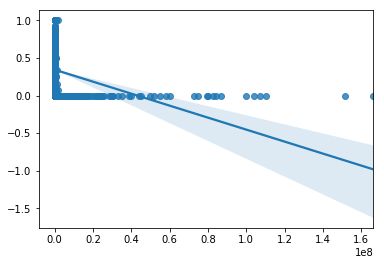

In [68]:
df2["t"] = df2.usd_goal_real
z = df2.groupby("t").state.mean()
sns.regplot(z.index.array, z.values)

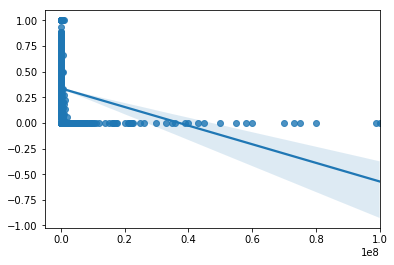

In [70]:
df2["a"] = df2.goal
z = df2.groupby("a").state.mean()
sns.regplot(z.index.array, z.values)

In [72]:
df2.isnull().sum()

category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
state            0
country          0
usd_goal_real    0
t                0
a                0
dtype: int64

In [73]:
y = df2["state"].values
X = df2[["usd_goal_real", "goal"]]
clf = SGDClassifier(loss='log', penalty='none', max_iter=1000, tol=1e-3)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
y_est = clf.predict(X)
pd.DataFrame(confusion_matrix(y, y_est), 
             index=['正解 = failed', '正解 = successful'], 
             columns=['予測 = failed', '予測 = successful'])

,予測 = failed,予測 = successful
正解 = failed,194436,3283
正解 = successful,132301,1655


In [78]:
precision, recall, _, _ = precision_recall_fscore_support(y, y_est)
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))
print('適合率 = {:.3f}%'.format(100 * precision[0]))
print('再現率 = {:.3f}%'.format(100 * recall[0]))

正答率 = 59.121%
適合率 = 59.508%
再現率 = 98.340%
